In [109]:
!pip install twython  -q
!pip install vaderSentiment -q
!pip install colorama -q

# Exploratory Data Analysis (EDA)


In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [111]:
df = pd.read_csv("sentimentdataset.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [113]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,366.464481,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,211.513936,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,183.750000,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,366.500000,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,549.250000,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,732.000000,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


## Première vue des données

À partir d’un premier aperçu des données avec df.head(), on observe plusieurs points importants.

Tout d’abord, certaines colonnes apparaissent sans nom explicite (Unnamed: 0, Unnamed: 0.1).

Ces colonnes semblent correspondre à des index sauvegardés par erreur lors de l’export des données et devront probablement être supprimées lors du nettoyage.

La colonne Sentiment constitue la variable cible de notre étude. Elle représente la classe que nous chercherons à prédire dans le cadre de la tâche de classification supervisée. L’ensemble de la modélisation reposera sur cette variable.

OOn observe également la présence de variables temporelles telles que Day et Hour, ainsi que des variables contextuelles comme Platform et Country. Ces variables pourraient potentiellement enrichir l’analyse en capturant des effets liés au contexte ou à la temporalité (par exemple, variation du sentiment selon la plateforme ou le moment de publication). Toutefois, aucune décision n’est prise à ce stade quant à leur intégration dans le modèle. Leur pertinence sera évaluée ultérieurement à travers une analyse exploratoire plus approfondie.

Enfin, le jeu de données contient une colonne de texte libre (Text), qui constitue l’information centrale pour l’analyse des sentiments. Ce contenu textuel sera soumis à une phase de prétraitement linguistique (nettoyage, tokenisation, suppression des stopwords, lemmatisation, vectorisation) avant d’être exploité par les modèles de classification.

À ce stade, il s’agit uniquement d’une analyse exploratoire préliminaire. Les prochaines étapes consisteront à :

vérifier la présence et la distribution des valeurs manquantes ;

identifier d’éventuelles incohérences, doublons ou données aberrantes ;

analyser la distribution de la variable cible ;

évaluer la qualité et la pertinence des variables disponibles.

Ces analyses permettront de guider les décisions relatives au nettoyage des données et à la sélection des variables avant la phase de modélisation.

Enfin, le jeu de données contient des textes qui constituent l’information principale pour l’analyse des sentiments.

À ce stade, il s’agit uniquement d’une analyse préliminaire. Les prochaines étapes consisteront à :

* vérifier la présence de valeurs manquantes,

* identifier d’éventuelles incohérences ou données non pertinentes,

* évaluer la qualité globale des variables disponibles,

avant de prendre toute décision concernant la sélection des features pour la modélisation.

In [114]:
def null_count(dataframe):
    """
    Retourne un résumé des valeurs manquantes pour chaque variable.
    """

    nulls = dataframe.isna().sum()

    summary = pd.DataFrame({
        "Feature": dataframe.columns,
        "Dtype": dataframe.dtypes.values,
        "NaN Count": nulls.values,
        "NaN (%)": (nulls.values / len(dataframe)) * 100
    })

    summary = summary.sort_values(by="NaN Count", ascending=False)

    return (
        summary.style
        .background_gradient(cmap="YlOrRd")
        .format({"NaN (%)": "{:.2f}%"})
    )

null_count(df)


,Feature,Dtype,NaN Count,NaN (%)
0,Unnamed: 0.1,int64,0,0.00%
1,Unnamed: 0,int64,0,0.00%
2,Text,object,0,0.00%
3,Sentiment,object,0,0.00%
4,Timestamp,object,0,0.00%
5,User,object,0,0.00%
6,Platform,object,0,0.00%
7,Hashtags,object,0,0.00%
8,Retweets,float64,0,0.00%
9,Likes,float64,0,0.00%


In [115]:
duplicate_count = df.duplicated().sum()

print(f"Number of duplicated rows: {duplicate_count}")
print(f"Percentage of duplicated rows: {(duplicate_count / len(df)) * 100:.2f}%")


Number of duplicated rows: 0
Percentage of duplicated rows: 0.00%


In [116]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')

In [117]:
for column in df.columns:
    num_distinct_values = df[column].nunique()
    print(f"{column:<20} → {num_distinct_values} distinct values")


Unnamed: 0.1         → 732 distinct values
Unnamed: 0           → 732 distinct values
Text                 → 707 distinct values
Sentiment            → 279 distinct values
Timestamp            → 683 distinct values
User                 → 685 distinct values
Platform             → 4 distinct values
Hashtags             → 697 distinct values
Retweets             → 26 distinct values
Likes                → 38 distinct values
Country              → 115 distinct values
Year                 → 14 distinct values
Month                → 12 distinct values
Day                  → 31 distinct values
Hour                 → 22 distinct values


In [118]:
df['Platform'].value_counts()

,count
Platform,
Instagram,258
Facebook,231
Twitter,128
Twitter,115


In [119]:
df['Country'].value_counts()

,count
Country,
USA,59
USA,55
UK,49
Canada,44
Australia,41
...,...
Ireland,1
Scotland,1
Kenya,1


Il semble qu’il n’y ait aucune valeur manquante, mais des doublons dissimulés sont présents et seront traités à l’étape suivante.

# Data Cleaning

Nous avons désormais confirmé que les colonnes Unnamed: 0 et Unnamed: 0.1 sont inutiles ; elles seront donc supprimées.

Comme notre analyse porte uniquement sur le contenu textuel et non sur les hashtags, la colonne hashtag sera également retirée.

En ce qui concerne les variables temporelles, nous nous concentrons uniquement sur l’année et le mois ; les colonnes day et hour seront donc supprimées.

Par ailleurs, puisque Sentiment constitue notre variable cible (target), elle ne sera pas incluse parmi les variables explicatives.

Enfin, nous supprimerons les espaces inutiles dans les colonnes platform et country.

In [120]:
df = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'Hashtags','Day', 'Hour'])
df['Platform'] = df['Platform'].str.strip()
df['Country'] = df['Country'].str.strip()

La colonne Timestamp est convertie en format datetime pour que Python l’interprète correctement comme une date.

Une nouvelle colonne Day_of_Week est créée pour indiquer le nom du jour, ce qui facilite les analyses temporelles, (identifier les jours les plus actifs).


In [121]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Day_of_Week'] = df['Timestamp'].dt.day_name()

In [122]:
month_mapping = {
    1: 'Janvier',
    2: 'Fevrier',
    3: 'Mars',
    4: 'Avril',
    5: 'Mai',
    6: 'Juin',
    7: 'Juillet',
    8: 'Aout',
    9: 'Septembre',
    10: 'Octobre',
    11: 'Novembre',
    12: 'Decembre'
}

In [123]:
df['Month'] = df['Month'].map(month_mapping)

In [124]:
df['Month'] = df['Month'].astype('object')

# Text Preprocessing

In [125]:
import string
import re
import nltk

In [126]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [127]:
stop_words = set(stopwords.words('english'))

In [128]:
lemmatizer = WordNetLemmatizer()

def clean(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return " ".join(tokens)

In [129]:
df["Clean_Text"] = df["Text"].apply(clean)

In [130]:
df[["Text", "Clean_Text"]].head()

,Text,Clean_Text
0,Enjoying a beautiful day at the park! ...,enjoying beautiful day park
1,Traffic was terrible this morning. ...,traffic terrible morning
2,Just finished an amazing workout! 💪 ...,finished amazing workout
3,Excited about the upcoming weekend getaway! ...,excited upcoming weekend getaway
4,Trying out a new recipe for dinner tonight. ...,trying new recipe dinner tonight


In [131]:
df1=df.copy()

In [132]:
df1=df1.drop(columns=['Sentiment'])

# Analyse VADER

In [133]:

import seaborn as sns
from colorama import Fore, init
import plotly.express as px
from nltk.sentiment import SentimentIntensityAnalyzer

from tqdm.notebook import tqdm
from collections import Counter
from wordcloud import WordCloud
nltk.download('vader_lexicon')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [134]:
analyzer = SentimentIntensityAnalyzer()

df1['Vader_Score'] = df1['Clean_Text'].apply(lambda text: analyzer.polarity_scores(text)['compound'])

df1['Sentiment'] = df1['Vader_Score'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))


In [135]:
print(df1[['Clean_Text', 'Vader_Score', 'Sentiment']].head())

                         Clean_Text  Vader_Score Sentiment
0       enjoying beautiful day park       0.8074  positive
1          traffic terrible morning      -0.4767  negative
2          finished amazing workout       0.5859  positive
3  excited upcoming weekend getaway       0.3400  positive
4  trying new recipe dinner tonight       0.0000   neutral


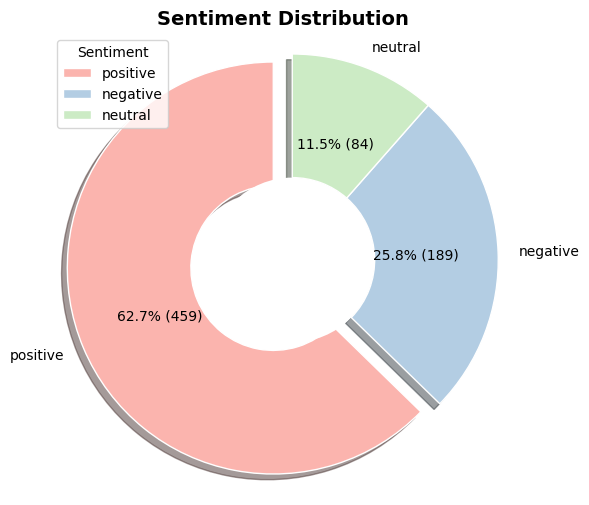

In [136]:
sentiment_counts = df1['Sentiment'].value_counts()
colors = plt.cm.Pastel1(range(len(sentiment_counts)))  # couleurs automatiques
explode = [0.1 if i == sentiment_counts.argmax() else 0 for i in range(len(sentiment_counts))]  # plus grande part explosée

fig, ax = plt.subplots(figsize=(6,6))

wedges, texts, autotexts = ax.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct=lambda p: f'{p:.1f}% ({int(p*sum(sentiment_counts)/100)})',
    wedgeprops=dict(width=0.6, edgecolor='w'),
    colors=colors,
    explode=explode,
    shadow=True,
    startangle=90,
    textprops=dict(size=10)
)
centre_circle = plt.Circle((0,0),0.4,fc='white')
ax.add_artist(centre_circle)
ax.set_title('Sentiment Distribution', fontsize=14, fontweight='bold')
ax.legend(sentiment_counts.index, title="Sentiment", loc="upper left")
ax.axis('equal')
plt.show()

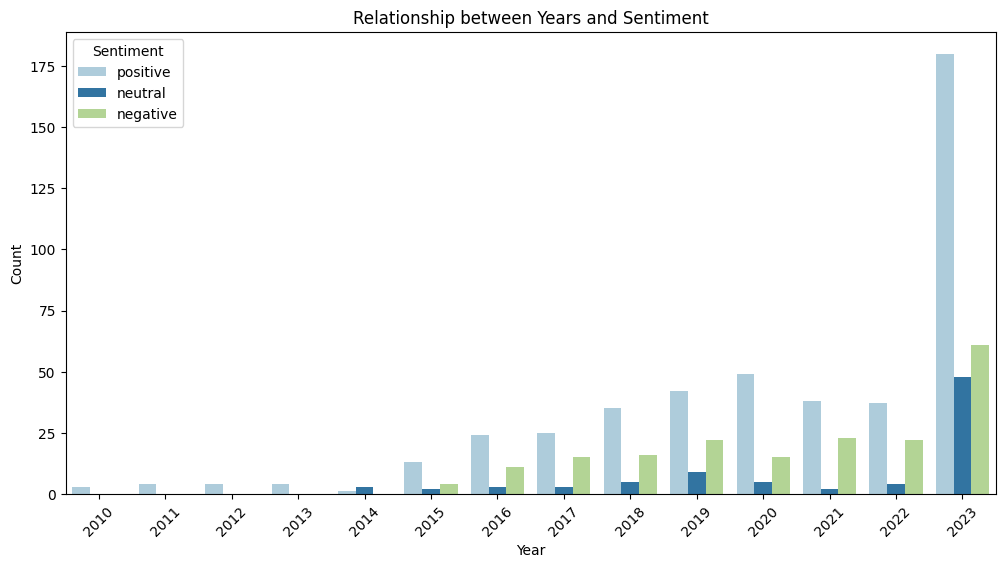

In [137]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', hue='Sentiment', data=df1, palette='Paired')
plt.title('Relationship between Years and Sentiment')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

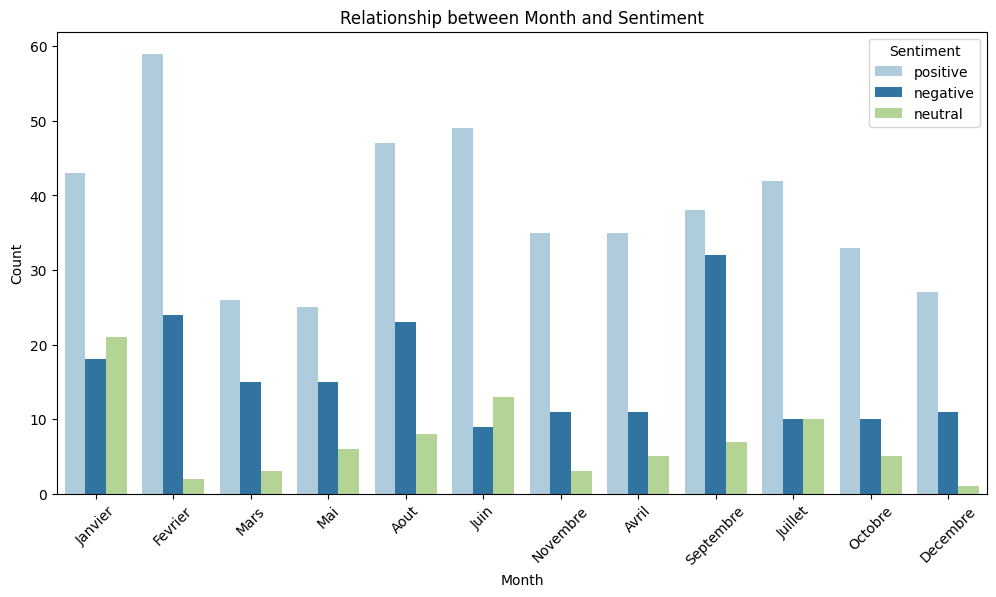

In [138]:

plt.figure(figsize=(12, 6))
sns.countplot(x='Month', hue='Sentiment', data=df1, palette='Paired')
plt.title('Relationship between Month and Sentiment')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

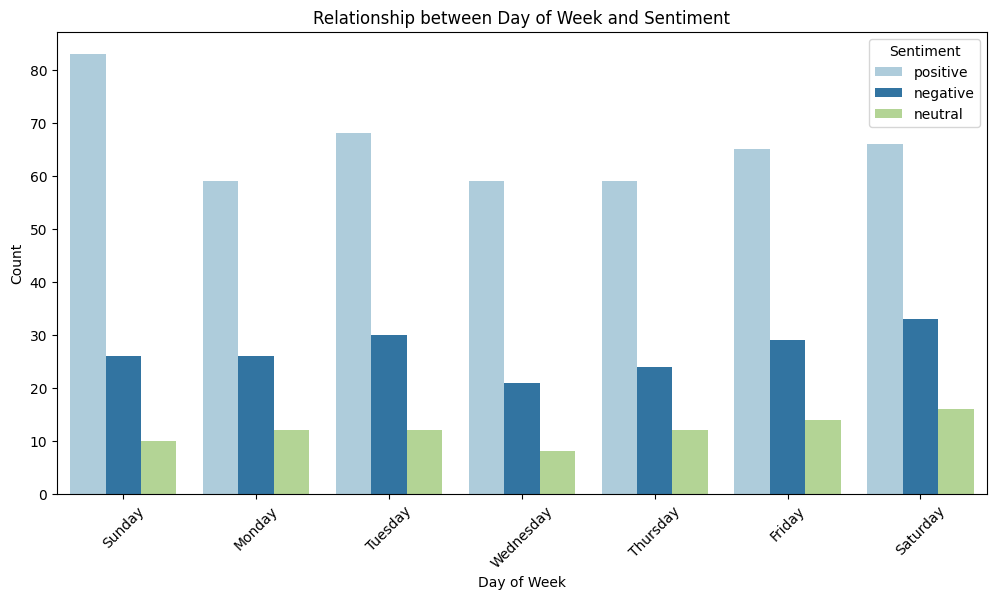

In [139]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Day_of_Week', hue='Sentiment', data=df1, palette='Paired')
plt.title('Relationship between Day of Week and Sentiment')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

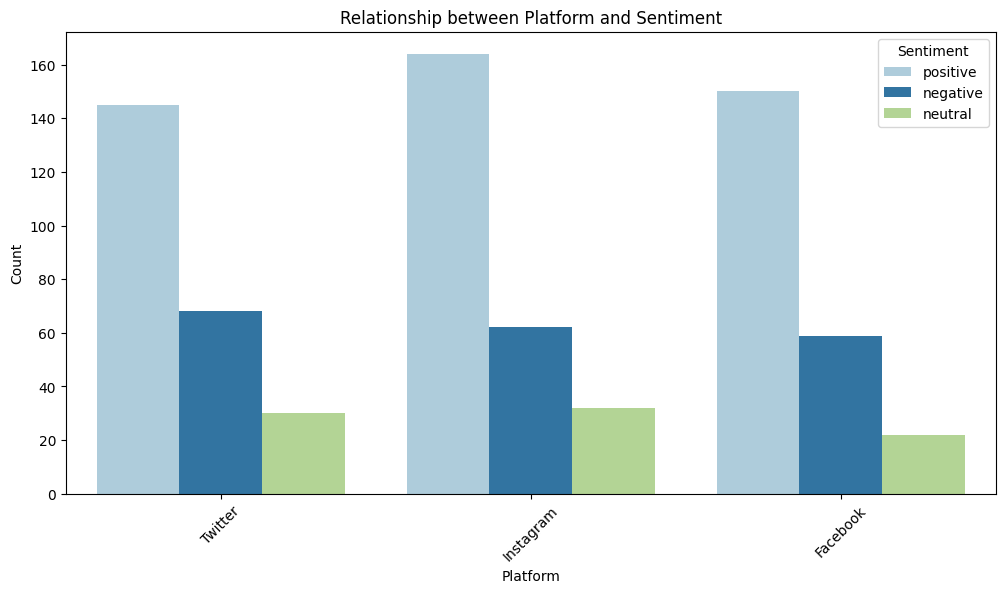

In [140]:

plt.figure(figsize=(12, 6))
sns.countplot(x='Platform', hue='Sentiment', data=df1, palette='Paired')
plt.title('Relationship between Platform and Sentiment')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

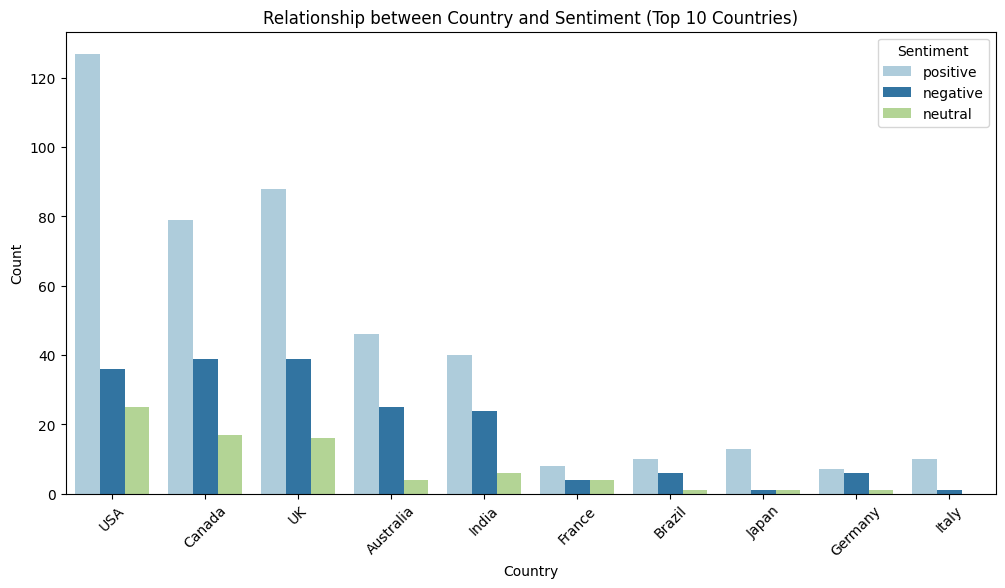

In [141]:



plt.figure(figsize=(12, 6))
top_10_countries = df1['Country'].value_counts().head(10).index
df_top_10_countries = df1[df1['Country'].isin(top_10_countries)]
sns.countplot(x='Country', hue='Sentiment', data=df_top_10_countries, palette='Paired')
plt.title('Relationship between Country and Sentiment (Top 10 Countries)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [142]:
from collections import Counter
from itertools import chain
import plotly.express as px

# Compter tous les mots directement
all_words = chain.from_iterable(df1['Clean_Text'].apply(lambda x: str(x).split()))
top_words = Counter(all_words)

# Top 20 mots
top_words_df = pd.DataFrame(top_words.most_common(20), columns=['Common_words', 'count'])

# Visualisation
fig = px.bar(top_words_df,
             x="count",
             y="Common_words",
             title='Top 20 Most Common Words',
             orientation='h',
             color='count',  # couleur basée sur la fréquence
             color_continuous_scale='Blues',
             height=600
            )

fig.update_layout(yaxis={'categoryorder':'total ascending'})  # ordre des bars
fig.show()


# ML Models

## Data Preparation

In [143]:
df2 = df1.copy()
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [144]:
X = df2['Clean_Text'].values
y = df2['Sentiment'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [145]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

## Model Training

In [146]:
from sklearn.linear_model import PassiveAggressiveClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

In [147]:
models = {
    "Passive Aggressive": PassiveAggressiveClassifier(max_iter=50, random_state=42, tol=1e-3),
    "Logistic Regression": LogisticRegression(max_iter=200, random_state=42, solver='liblinear'),
    "Random Forest": RandomForestClassifier(random_state=42, n_jobs=-1),
    "SVM": SVC(random_state=42, probability=True),
    "Naive Bayes": MultinomialNB()
}
trained_models = {}

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    trained_models[name] = model

le but ici c'est de comparer les differents modeles

# Model Evaluation

## Evaluation globale

In [148]:
from sklearn.metrics import accuracy_score, classification_report

In [149]:
for name, model in trained_models.items():
    y_pred = model.predict(X_test_tfidf)

    print("="*50)
    print(f"{name}")
    print("="*50)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:\n")
    print(classification_report(y_test, y_pred))

Passive Aggressive
Accuracy: 0.8163
Classification Report:

              precision    recall  f1-score   support

    negative       0.85      0.82      0.84        40
     neutral       0.40      0.29      0.33        14
    positive       0.85      0.89      0.87        93

    accuracy                           0.82       147
   macro avg       0.70      0.67      0.68       147
weighted avg       0.80      0.82      0.81       147

Logistic Regression
Accuracy: 0.7143
Classification Report:

              precision    recall  f1-score   support

    negative       0.92      0.30      0.45        40
     neutral       0.00      0.00      0.00        14
    positive       0.69      1.00      0.82        93

    accuracy                           0.71       147
   macro avg       0.54      0.43      0.42       147
weighted avg       0.69      0.71      0.64       147

Random Forest
Accuracy: 0.7823
Classification Report:

              precision    recall  f1-score   support

    neg

. Passive Aggressive

* Accuracy : 0.816 → le modèle classe correctement environ 82 % des exemples.

* negative et positive : très bons scores de precision et recall (≈0.85), donc ces classes sont bien détectées.

* neutral : faible recall (0.29) et f1-score (0.33) → le modèle a du mal à identifier les exemples neutres.

Globalement, c’est le meilleur modèle pour ce jeu de données, car il a le meilleur f1-score moyen pondéré (0.81) et une bonne balance entre classes majoritaires et minoritaires.

. Logistic Regression

* Accuracy : 0.714 → moins performant que Passive Aggressive.

+ negative : très bonne precision (0.92) mais recall faible (0.30) → beaucoup de negative sont mal classés.

+ neutral : precision et recall à 0 → le modèle ne reconnaît quasiment aucun exemple neutre.

+ positive : recall parfait (1.0) mais precision moins bonne (0.69) → il prédit beaucoup de positive, parfois à tort.

le modèle est biaisé vers la classe majoritaire (positive) et n’est pas fiable pour les classes minoritaires.

. Random Forest

+ Accuracy : 0.782 → légèrement moins que Passive Aggressive.

+ negative : recall modéré (0.57), precision élevée (0.88) → il prédit peu de négatifs mais quand il le fait, c’est souvent correct.

+ neutral : recall très faible (0.07) → la classe neutre est presque ignorée.

+ positive : excellent recall (0.98), f1-score solide (0.85).

le modèle favorise fortement la classe majoritaire (positive) et ignore presque la classe neutre.

. SVM

+ Accuracy : 0.741 → comparable à Logistic Regression mais moins bon que Random Forest et Passive Aggressive.

+ negative : recall faible (0.40) malgré une precision très élevée (0.94) → beaucoup de négatifs sont classés à tort.

+ neutral : rappel 0 → ne détecte aucun neutre.

+ positive : recall parfait (1.0) mais precision moyenne (0.72).

Comme Logistic Regression, SVM est très biaisé vers la classe majoritaire et néglige les classes minoritaires.

. Naive Bayes

+ Accuracy : 0.782 → similaire à Random Forest.

+ negative : bonne precision (0.96) mais recall moyen (0.55).

+ neutral : recall 0 → ne détecte aucun neutre.

+ positive : recall parfait (1.0) et f1-score élevé (0.86).

 même comportement que Random Forest et SVM : les classes minoritaires sont négligées, la classe majoritaire (positive) domine.

## Hyperparameter Tuning

In [150]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
import seaborn as sns
import matplotlib.pyplot as plt

In [151]:

param_dist = {
    'C': [0.1, 0.5, 1.0],
    'fit_intercept': [True, False],
    'shuffle': [True, False],
    'verbose': [0, 1]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    PassiveAggressiveClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=10,
    cv=cv,
    scoring='accuracy',
    random_state=42
)

random_search.fit(X_train_tfidf, y_train)

best_pac = random_search.best_estimator_
y_pred_best = best_pac.predict(X_test_tfidf)

print("Best Passive Aggressive Model")
print("Best Parameters:", random_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_best))

-- Epoch 1
Norm: 10.55, NNZs: 1711, Bias: -0.442346, T: 468, Avg. loss: 0.614011
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 14.90, NNZs: 1740, Bias: -0.328716, T: 936, Avg. loss: 0.220364
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 16.56, NNZs: 1748, Bias: -0.284466, T: 1404, Avg. loss: 0.078165
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 17.16, NNZs: 1748, Bias: -0.287077, T: 1872, Avg. loss: 0.029305
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 17.45, NNZs: 1748, Bias: -0.296193, T: 2340, Avg. loss: 0.014294
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 17.58, NNZs: 1748, Bias: -0.301610, T: 2808, Avg. loss: 0.006693
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 17.67, NNZs: 1748, Bias: -0.302648, T: 3276, Avg. loss: 0.003741
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 17.70, NNZs: 1748, Bias: -0.303762, T: 3744, Avg. loss: 0.001422
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 17.72, NNZs: 1748, Bias: -0.303951, T: 4212, Avg.

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


-- Epoch 1
Norm: 13.13, NNZs: 1715, Bias: 0.000000, T: 468, Avg. loss: 0.693095
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 16.17, NNZs: 1715, Bias: 0.000000, T: 936, Avg. loss: 0.183417
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 17.59, NNZs: 1719, Bias: 0.000000, T: 1404, Avg. loss: 0.069606
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 18.05, NNZs: 1719, Bias: 0.000000, T: 1872, Avg. loss: 0.022976
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 18.20, NNZs: 1719, Bias: 0.000000, T: 2340, Avg. loss: 0.008946
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 18.33, NNZs: 1719, Bias: 0.000000, T: 2808, Avg. loss: 0.006561
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 18.42, NNZs: 1719, Bias: 0.000000, T: 3276, Avg. loss: 0.004091
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 18.46, NNZs: 1719, Bias: 0.000000, T: 3744, Avg. loss: 0.001612
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 18.49, NNZs: 1719, Bias: 0.000000, T: 4212, Avg. loss: 0.

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


Norm: 16.41, NNZs: 1725, Bias: 0.000000, T: 468, Avg. loss: 0.581353
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 18.16, NNZs: 1730, Bias: 0.000000, T: 936, Avg. loss: 0.096128
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 18.79, NNZs: 1733, Bias: 0.000000, T: 1404, Avg. loss: 0.028378
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 18.99, NNZs: 1733, Bias: 0.000000, T: 1872, Avg. loss: 0.009553
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 19.09, NNZs: 1733, Bias: 0.000000, T: 2340, Avg. loss: 0.004278
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 19.14, NNZs: 1733, Bias: 0.000000, T: 2808, Avg. loss: 0.002081
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 19.16, NNZs: 1733, Bias: 0.000000, T: 3276, Avg. loss: 0.001025
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 19.17, NNZs: 1733, Bias: 0.000000, T: 3744, Avg. loss: 0.000646
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 19.18, NNZs: 1733, Bias: 0.000000, T: 4212, Avg. loss: 0.000274
Tota

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


Best Passive Aggressive Model
Best Parameters: {'verbose': 0, 'shuffle': True, 'fit_intercept': True, 'C': 0.5}
Accuracy: 0.8163265306122449

Classification Report:

              precision    recall  f1-score   support

    negative       0.87      0.82      0.85        40
     neutral       0.33      0.21      0.26        14
    positive       0.84      0.90      0.87        93

    accuracy                           0.82       147
   macro avg       0.68      0.65      0.66       147
weighted avg       0.80      0.82      0.81       147



## Confusion Matrix

In [152]:
from sklearn.metrics import confusion_matrix

### Standard

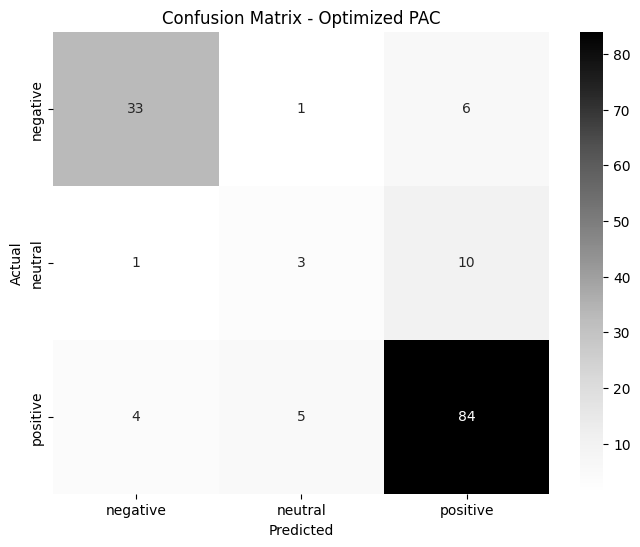

In [153]:
conf_matrix = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8,6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cmap='Greys',
    xticklabels=['negative','neutral','positive'],
    yticklabels=['negative','neutral','positive']
)

plt.title("Confusion Matrix - Optimized PAC")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Normalized

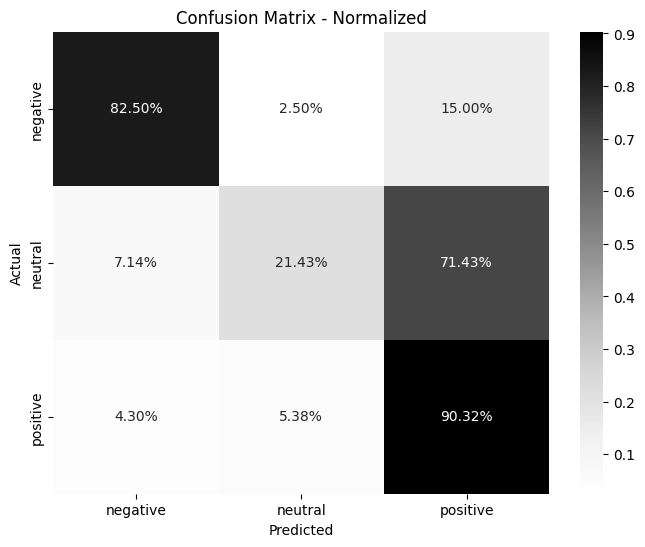

In [154]:
conf_matrix_norm = conf_matrix / conf_matrix.sum(axis=1)[:, None]

plt.figure(figsize=(8,6))
sns.heatmap(
    conf_matrix_norm,
    annot=True,
    fmt='.2%',
    cmap='Greys',
    xticklabels=['negative','neutral','positive'],
    yticklabels=['negative','neutral','positive']
)

plt.title("Confusion Matrix - Normalized")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


##Comparaison Graphique des Modèles

In [155]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score

results = []

for name, model in trained_models.items():
    y_pred = model.predict(X_test_tfidf)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')

    results.append({
        "Model": name,
        "Accuracy": acc,
        "F1_macro": f1
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="F1_macro", ascending=False)

results_df


,Model,Accuracy,F1_macro
0,Passive Aggressive,0.816327,0.679295
2,Random Forest,0.782313,0.561588
4,Naive Bayes,0.782313,0.518519
3,SVM,0.741497,0.465161
1,Logistic Regression,0.714286,0.424071


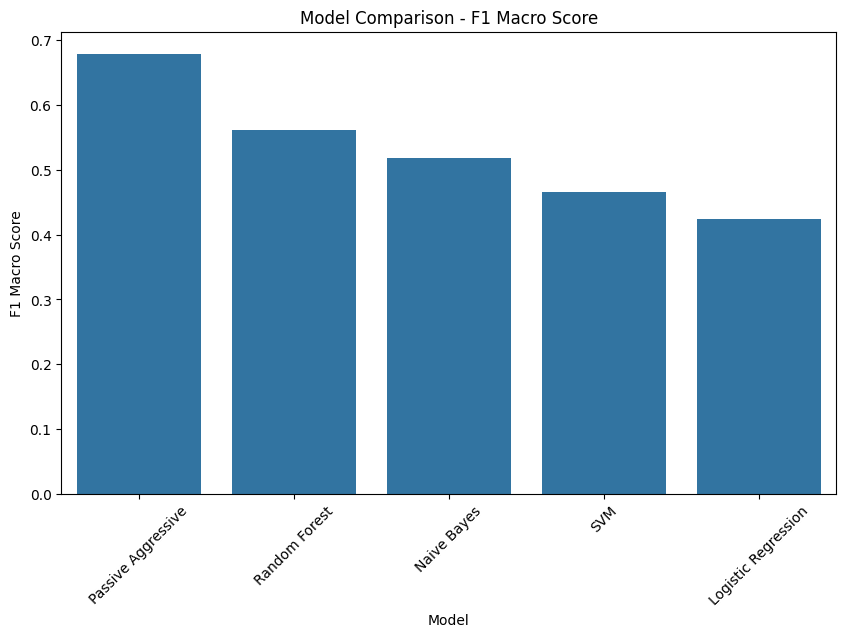

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(data=results_df, x="Model", y="F1_macro")
plt.title("Model Comparison - F1 Macro Score")
plt.xticks(rotation=45)
plt.ylabel("F1 Macro Score")
plt.show()


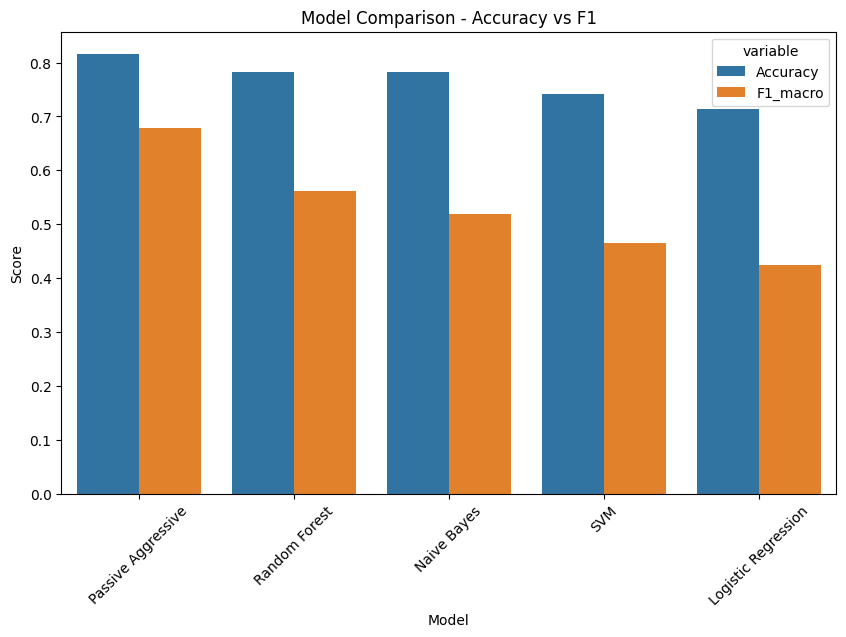

In [157]:
results_df_melted = results_df.melt(id_vars="Model",
                                    value_vars=["Accuracy","F1_macro"])

plt.figure(figsize=(10,6))
sns.barplot(data=results_df_melted,
            x="Model",
            y="value",
            hue="variable")

plt.title("Model Comparison - Accuracy vs F1")
plt.xticks(rotation=45)
plt.ylabel("Score")
plt.show()


## ROC Curves Multiclasses

In [158]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np

classes = ['negative', 'neutral', 'positive']

y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]


In [159]:
model = trained_models["Logistic Regression"]


In [160]:
y_score = model.predict_proba(X_test_tfidf)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


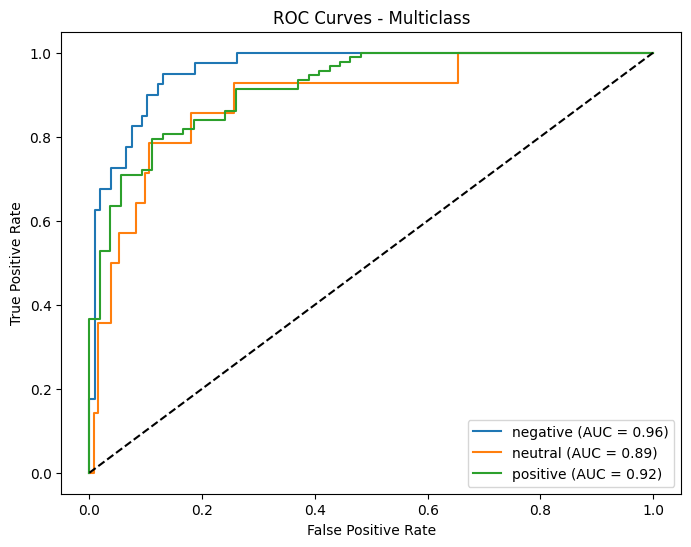

In [161]:
plt.figure(figsize=(8,6))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i],
             label=f"{classes[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - Multiclass")
plt.legend()
plt.show()
